In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.formula.api as smf
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [4]:
# load data
datapath = '../../csv/tdcs.csv'
data = pd.read_csv(datapath)

# wm & noise difference relationship - frontal vs sham
None of the changes in noise parameters significantly predicted changes in WM variance. 

In [5]:
results_Fr = smf.ols("FrSh_VarAve ~ FrSh_Na + FrSh_Nm + FrSh_Af", data=data).fit()
print(results_Fr.summary())

                            OLS Regression Results                            
Dep. Variable:            FrSh_VarAve   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1.720
Date:                Fri, 29 Aug 2025   Prob (F-statistic):              0.212
Time:                        12:24:32   Log-Likelihood:                 11.302
No. Observations:                  17   AIC:                            -14.60
Df Residuals:                      13   BIC:                            -11.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0172      0.038      0.451      0.6

/Users/wpark78/Documents/code/ptm-wm-sz/env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


# wm & noise difference relationship - parietal vs sham
Only the changes in internal additive noise significantly predicted changes in WM variance. 

In [6]:
# parietal vs sham
results_Pz = smf.ols("PzSh_VarAve ~ PSh_Na + PSh_Nm + PSh_Af", data=data).fit()
print(results_Pz.summary())

                            OLS Regression Results                            
Dep. Variable:            PzSh_VarAve   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     3.796
Date:                Fri, 29 Aug 2025   Prob (F-statistic):             0.0350
Time:                        12:24:32   Log-Likelihood:                 11.428
No. Observations:                  18   AIC:                            -14.86
Df Residuals:                      14   BIC:                            -11.29
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0898      0.050     -1.810      0.0

/Users/wpark78/Documents/code/ptm-wm-sz/env/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


In [8]:
import statsmodels.api as sm
aov = sm.stats.anova_lm(results_Pz, typ=2)   # columns: sum_sq, df, F, PR(>F)
ss_resid = aov.loc['Residual', 'sum_sq']

# partial eta-squared per term
aov['eta_p2'] = aov['sum_sq'] / (aov['sum_sq'] + ss_resid)
print(aov[['df', 'F', 'PR(>F)', 'eta_p2']])

            df         F    PR(>F)    eta_p2
PSh_Na     1.0  5.585602  0.033107  0.285189
PSh_Nm     1.0  4.211007  0.059353  0.231234
PSh_Af     1.0  0.081456  0.779513  0.005785
Residual  14.0       NaN       NaN  0.500000


# figure - frontal vs sham

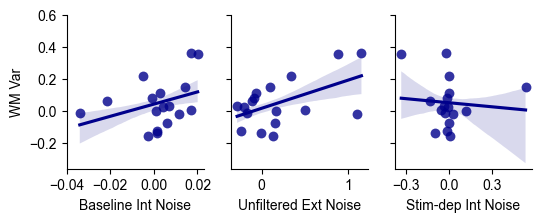

In [9]:
f, axs = plt.subplots(1, 3, sharey=True)
f.set_size_inches(6, 2)
plt.subplots_adjust(wspace=0.2)
colors = ['darkblue', 'cornflowerblue', 'lightsteelblue']

sns.regplot(data=data, x='FrSh_Na', y='FrSh_VarAve', ci=68, ax=axs[0], color=colors[0], scatter_kws={'linewidths': 0, 's':50})
axs[0].set_xlabel('Baseline Int Noise')
axs[0].set_ylabel('WM Var')
axs[0].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xticks([-0.04, -0.02, 0, 0.02])

sns.regplot(data=data, x='FrSh_Af', y='FrSh_VarAve', ci=68, ax=axs[1], color=colors[0], scatter_kws={'linewidths': 0, 's':50})
axs[1].set_xlabel('Unfiltered Ext Noise')
axs[1].set_ylabel('')
axs[1].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[1].set_xticks([0, 1])

sns.regplot(data=data, x='FrSh_Nm', y='FrSh_VarAve', ci=68, ax=axs[2], color=colors[0], scatter_kws={'linewidths': 0, 's':50})
axs[2].set_xlabel('Stim-dep Int Noise')
axs[2].set_ylabel('')
axs[2].set_yticks([-0.2, 0, 0.2, 0.4, 0.6])
axs[2].set_xticks([-0.3, 0, 0.3])

sns.despine()

plt.savefig('tdcs-corr-fr.pdf', dpi=300, transparent=True, bbox_inches="tight")

# figure - parietal vs sham

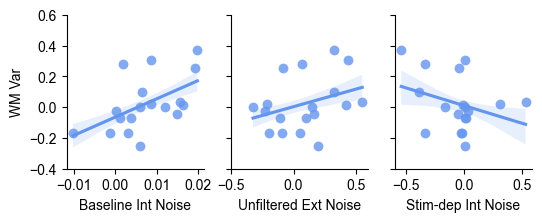

In [10]:
f, axs = plt.subplots(1, 3, sharey=True)
f.set_size_inches(6, 2)
plt.subplots_adjust(wspace=0.2)
colors = ['darkblue', 'cornflowerblue', 'lightsteelblue']

sns.regplot(data=data, x='PSh_Na', y='PzSh_VarAve', ci=68, ax=axs[0], color=colors[1], scatter_kws={'linewidths': 0, 's':50})
axs[0].set_xlabel('Baseline Int Noise')
axs[0].set_ylabel('WM Var')
axs[0].set_yticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6])
axs[0].set_xticks([-0.01, 0, 0.01, 0.02])

sns.regplot(data=data, x='PSh_Af', y='PzSh_VarAve', ci=68, ax=axs[1], color=colors[1], scatter_kws={'linewidths': 0, 's':50})
axs[1].set_xlabel('Unfiltered Ext Noise')
axs[1].set_ylabel('')
axs[1].set_yticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6])
axs[1].set_xticks([-0.5, 0, 0.5])

sns.regplot(data=data, x='PSh_Nm', y='PzSh_VarAve', ci=68, ax=axs[2], color=colors[1], scatter_kws={'linewidths': 0, 's':50})
axs[2].set_xlabel('Stim-dep Int Noise')
axs[2].set_ylabel('')
axs[2].set_yticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6])
axs[2].set_xticks([-0.5, 0, 0.5])

sns.despine()

plt.savefig('tdcs-corr-par.pdf', dpi=300, transparent=True, bbox_inches="tight")